# Chicago NWS Radar (KLOT) Data, 07/04/23 and ATMOS Column Extraction. 
### Using Py-ART to plot KLOT data and extracting column above ATMOS site. 

---

In [15]:
import pyart
import fsspec
from metpy.plots import USCOUNTIES
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
from pyart.testing import get_test_data
warnings.filterwarnings("ignore")

## Reading in KLOT files and plotting using PY-art. Focus on reflectivity and velocity fields. 

In [16]:
fs = fsspec.filesystem("s3", anon=True)

In [17]:
files = sorted(fs.glob("s3://noaa-nexrad-level2/2023/07/04/KLOT/KLOT20230704_20*"))
files

['noaa-nexrad-level2/2023/07/04/KLOT/KLOT20230704_200117_V06',
 'noaa-nexrad-level2/2023/07/04/KLOT/KLOT20230704_200515_V06',
 'noaa-nexrad-level2/2023/07/04/KLOT/KLOT20230704_200846_V06',
 'noaa-nexrad-level2/2023/07/04/KLOT/KLOT20230704_201212_V06',
 'noaa-nexrad-level2/2023/07/04/KLOT/KLOT20230704_201551_V06',
 'noaa-nexrad-level2/2023/07/04/KLOT/KLOT20230704_201929_V06',
 'noaa-nexrad-level2/2023/07/04/KLOT/KLOT20230704_202312_V06',
 'noaa-nexrad-level2/2023/07/04/KLOT/KLOT20230704_202657_V06',
 'noaa-nexrad-level2/2023/07/04/KLOT/KLOT20230704_203055_V06',
 'noaa-nexrad-level2/2023/07/04/KLOT/KLOT20230704_203451_V06',
 'noaa-nexrad-level2/2023/07/04/KLOT/KLOT20230704_203833_V06',
 'noaa-nexrad-level2/2023/07/04/KLOT/KLOT20230704_204213_V06',
 'noaa-nexrad-level2/2023/07/04/KLOT/KLOT20230704_204609_V06',
 'noaa-nexrad-level2/2023/07/04/KLOT/KLOT20230704_205006_V06',
 'noaa-nexrad-level2/2023/07/04/KLOT/KLOT20230704_205410_V06',
 'noaa-nexrad-level2/2023/07/04/KLOT/KLOT20230704_20581

In [18]:
radar = pyart.io.read_nexrad_archive(f's3://{files[3]}')

In [19]:
list(radar.fields)

['clutter_filter_power_removed',
 'reflectivity',
 'cross_correlation_ratio',
 'spectrum_width',
 'velocity',
 'differential_reflectivity',
 'differential_phase']

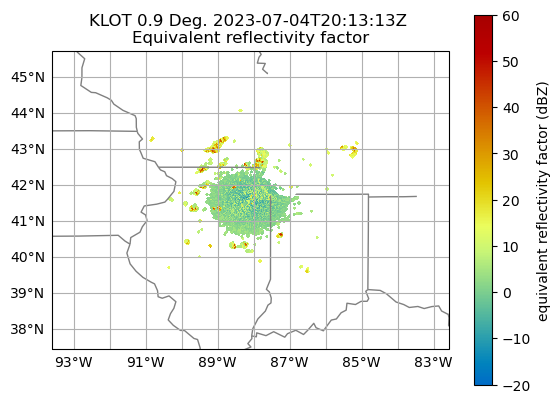

In [20]:
display = pyart.graph.RadarMapDisplay(radar) ## reflectivity data
display.plot_ppi_map('reflectivity',
                     sweep=3,
                     vmin=-20,
                     vmax=60,
                     projection=ccrs.PlateCarree()
                    )

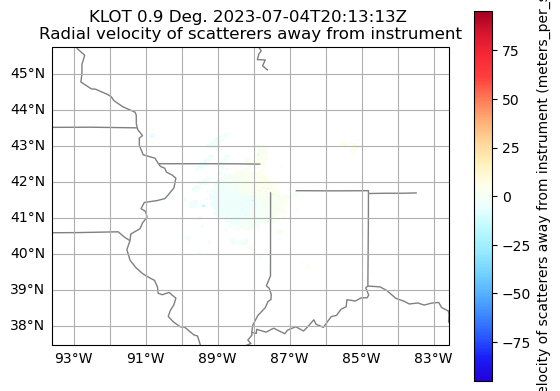

In [21]:
display.plot_ppi_map('velocity', ## velocity data
                     sweep=3,
                     projection=ccrs.PlateCarree(),
                    )

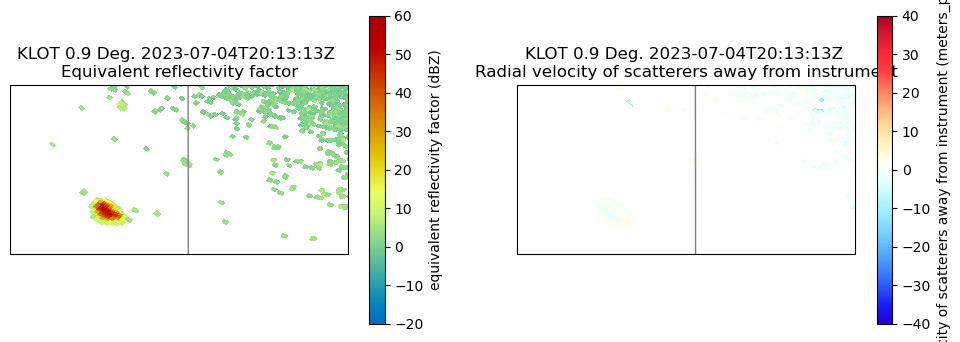

In [22]:
fig = plt.figure(figsize=[12, 4]) #plotting figures side by side, zoomed in

# first plot, reflectivity 
ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity',
                     sweep=3,
                     vmin=-20,
                     vmax=60,
                     ax=ax1,)

# Zoom in by setting the xlim/ylim
plt.xlim(-87, -88)
plt.ylim(40.5, 41)

# second plot, velocity
ax2 = plt.subplot(122, projection=ccrs.PlateCarree())
display.plot_ppi_map('velocity',
                     sweep=3,
                     vmin=-40,
                     vmax=40,
                     projection=ccrs.PlateCarree(),
                     ax=ax2,)

# Zooming in near ATMOS site
plt.xlim(-87, -88)
plt.ylim(40.5, 41)
plt.show()

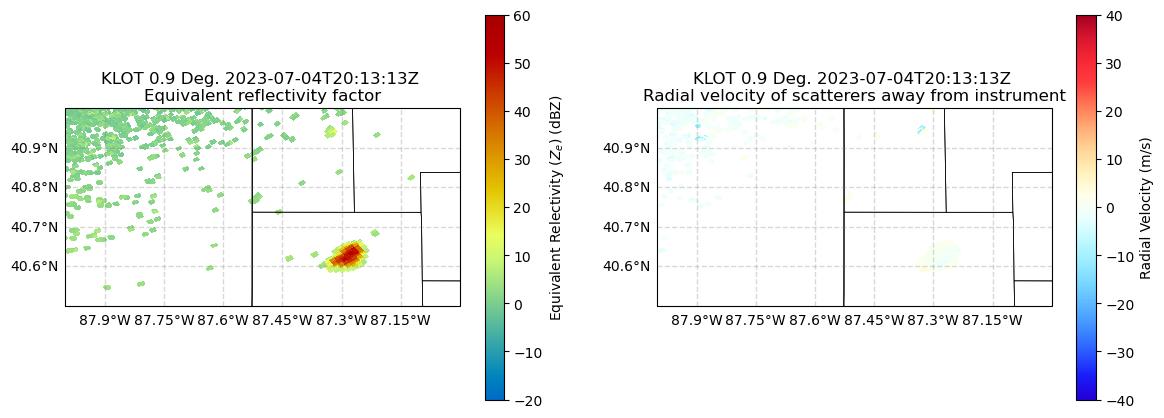

In [23]:
# subplots with additional gridlines and counties 
fig = plt.figure(figsize=[14, 5])

# Setup our first axis with reflectivity
ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
display = pyart.graph.RadarMapDisplay(radar)
ref_map = display.plot_ppi_map('reflectivity',
                               sweep=3,
                               vmin=-20,
                               vmax=60,
                               ax=ax1,
                               colorbar_label='Equivalent Relectivity ($Z_{e}$) (dBZ)')


# Zoom in by setting the xlim/ylim
plt.xlim(-88, -87)
plt.ylim(40.5, 41)

# Add gridlines
gl = ax1.gridlines(crs=ccrs.PlateCarree(),
                  draw_labels=True,
                  linewidth=1, 
                  color='gray', 
                  alpha=0.3,
                  linestyle='--')

# Make sure labels are only plotted on the left and bottom
gl.xlabels_top = False
gl.ylabels_right = False

# Increase the fontsize of our gridline labels
gl.xlabel_style = {'fontsize':10}
gl.ylabel_style = {'fontsize':10}

# Add counties
ax1.add_feature(USCOUNTIES,
                linewidth=0.5)

# Setup our second axis for velocity
ax2 = plt.subplot(122, projection=ccrs.PlateCarree())
vel_plot = display.plot_ppi_map('velocity',
                                sweep=3,
                                vmin=-40,
                                vmax=40,
                                projection=ccrs.PlateCarree(),
                                ax=ax2,
                                colorbar_label='Radial Velocity (m/s)')

# Zoom in by setting the xlim/ylim
plt.xlim(-88, -87)
plt.ylim(40.5, 41)

# Add gridlines
gl = ax2.gridlines(crs=ccrs.PlateCarree(),
                   draw_labels=True,
                   linewidth=1, 
                   color='gray', 
                   alpha=0.3,
                   linestyle='--')

# Make sure labels are only plotted on the left and bottom
gl.xlabels_top = False
gl.ylabels_right = False

# Increase the fontsize of our gridline labels
gl.xlabel_style = {'fontsize':10}
gl.ylabel_style = {'fontsize':10}

# Add counties
ax2.add_feature(USCOUNTIES,
                linewidth=0.5)
plt.show()

## Visualize Radar Data Surrounding ATMOS Site.

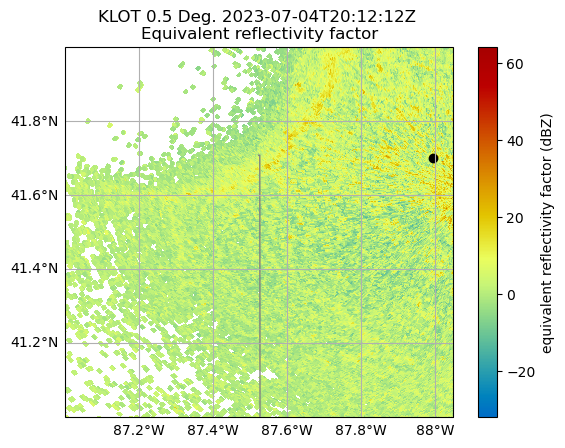

In [24]:
site_lon = -87.99512386322021  #ATMOS site coordinates
site_lat = 41.70178755070838 
display = pyart.graph.RadarMapDisplay(radar)
ax = plt.subplot(111, projection=ccrs.PlateCarree())
plt.xlim(-87, -88.05) #zooming in 
plt.ylim(41, 42)
display.plot_ppi_map(
    "reflectivity",
    0,
    ax=ax,
    vmin=-32,
    vmax=64.0,
    lon_lines=np.arange(-88, -87, 0.2),
    lat_lines=np.arange(41, 42, 0.2),
)
#Mark ATMOS location
ax.scatter(site_lon, site_lat, color="black")

## Data Extraction for Column Above ATMOS site. 

In [25]:
ds = pyart.util.columnsect.get_field_location(radar, site_lat, site_lon)

In [26]:
print (ds)

<xarray.Dataset>
Dimensions:                       (height: 12)
Coordinates:
  * height                        (height) float64 359.0 359.0 ... 1.669e+03
Data variables:
    clutter_filter_power_removed  (height) float64 nan nan 10.0 ... 9.0 11.0 2.0
    reflectivity                  (height) float64 10.0 10.0 19.0 ... nan -11.5
    cross_correlation_ratio       (height) float64 0.5883 nan ... nan 0.9483
    spectrum_width                (height) float64 nan nan nan ... nan nan 1.5
    velocity                      (height) float64 nan nan nan ... nan nan 4.5
    differential_reflectivity     (height) float64 -0.3125 nan ... nan 2.562
    differential_phase            (height) float64 41.61 nan 116.0 ... nan 66.99
    base_time                     datetime64[ns] 2023-07-04T20:12:12
    time_offset                   (height) datetime64[ns] 2023-07-04T20:12:23...
Attributes:
    distance_from_radar:    13.124 km
    azimuth:                34.404 degrees
    latitude_of_location:   41.70

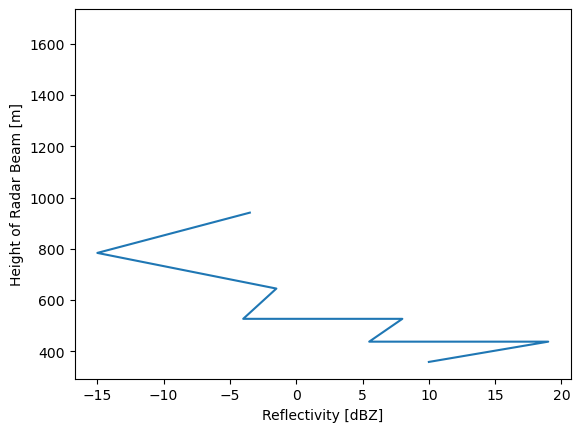

In [27]:
#reflectivity plot over site point (column above ATMOS)
ds.reflectivity.plot(y="height") 

---

## Summary 
### This notebook reads in files from the Chicago NWS Radar (KLOT) data, uses PY-art to plot specifically reflectivity fields with gridlines and counties and zooms into an area near the ATMOS site of Argonne National Laboratory. 
### Also extracts an xarray dataset for a column directly above the ATMOS site. 